# Prediction ellipse and prediction ellipsoid

Marcos Duarte

To describe the dispersion of data or to make a prediction for a sample, we can calculate a [prediction interval](http://en.wikipedia.org/wiki/Prediction_interval) or [tolerance interval](http://en.wikipedia.org/wiki/Tolerance_interval). For the specific case of a univariate random variable, see [Confidence and prediction intervals](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/ConfidencePredictionIntervals.ipynb). For a multivariate random variable, we need to calculate a prediction hyperellipsoid ([Chew, 1966](http://www.jstor.org/stable/2282774)):

> The 95% prediction hyperellipsoid is a prediction interval for a sample of a multivariate random variable such that there is 95% of probability that a new observation will lie inside the hyperellipsoid.

The 95% prediction interval (a p-dimensional hyperellipsoid) for a sample of a multivariate random variable with $p$ dimensions and size $n$ from a population with normal distribution is given by the following probabilistic bounds which holds 95% of the time (Chew, 1966):

$$ (x_{n+1}-\bar{x})'\: S^{-1} (x_{n+1}-\bar{x}) \leq \frac{F_{(0.95,\: p,\: n-p)}(n-1)\:p\:(n+1)}{n\:(n-p)} $$

Where $x_{n+i}$ (with dimension $p$) is the new observation for which we want to calculate the prediction interval; $F$ is the [F-distribution](http://en.wikipedia.org/wiki/F-distribution); $\bar{x}$ is the sample mean (with dimension $p$), and $S$ is the [sample covariance matrix](http://en.wikipedia.org/wiki/Sample_mean_and_sample_covariance) defined as:

$$ S_{j,k} = \frac{1}{n-1}\sum_{i=1}^{n}(x_{ij}-\bar{x}_j)(x_{ik}-\bar{x}_k) $$

This is the formula for the prediction of the next single observation where the population mean and variance are unknown (we only have estimates of these parameters from the sample). This formula is also equivalent to the formula for calculation of a tolerance region (called Type 2 tolerance region by [Chew (1966)](http://www.jstor.org/stable/2282774)):

> The 95% tolerance hyperellipsoid is a tolerance region for a sample of a multivariate random variable such that the average or expected value of the proportion of the population contained in the hyperellipsoid is 95%.

In this context, we can refer to the calculated hyperellipsoid as a prediction or tolerance hyperellipsoid (but prediction and tolerance intervals are in general different concepts in statistics).

The function `hyperellipsoid.py` (code at the end of this text) calculates the prediction or tolerance hyperellipsoid, some related parameters, and plots the results for a given multivariate random variable. The function signature is:
```python
hypervol, saxes, angles, p0, R = hyperellipsoid(P, y=None, z=None, pvalue=.95,
                                                units=None, show=True, ax=None):
```
Before showing how to use this code, let's look a bit more at the statistical principles behind the estimation of a prediction or tolerance interval.

<!-- TEASER_END -->

## Univariate variable

For $p$ = 1 (univariate case) the 95% prediction interval formula above reduces to:

$$ \left|\frac{x_{n+1}-\bar{x}}{s}\right| \leq \sqrt{F_{(0.95,\: 1,\: n-1)}(1+1/n)} $$

Where $s$ is the square root of the sample covariance, the sample standard deviation.

And considering that $F_{(0.95,\: 1,\: n-1)}$ is equal to $T^2_{(0.975,\: n-1)}$, the square of the <a href="http://en.wikipedia.org/wiki/Student's_t-distribution">Student's t-distribution</a>, finally we have:

$$ \left|x_{n+1}-\bar{x}\right| \leq s\:T_{(0.975,\: n-1)}\sqrt{1+1/n} $$

Indeed, this results in the 95% prediction interval used for a sample of a univariate variable, see [Confidence and prediction intervals](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/ConfidencePredictionIntervals.ipynb).

For large $n$, according to the [central limit theorem](http://en.wikipedia.org/wiki/Central_limit_theorem), we can use the fact that $T(\infty)=N$, where $N$ is the [normal distribution](http://en.wikipedia.org/wiki/Normal_distribution), and the above statement can be simplified to:

$$ \left|x_{n+1}-\bar{x}\right| \leq s\:N_{0.975} $$

$N_{0.975}$ is equal to 1.96, a commonly used value for calculating 95%-probability intervals.   
Let's calculate the error of this approximation for different sample sizes.  
First let's import the necessary Python libraries:

In [1]:
# import the necessary libraries
import numpy as np
from scipy import stats

In [2]:
F = lambda p, n: np.sqrt(stats.f.ppf(0.95, p, n-p)*(n-1)*p*(n+1)/n/(n-p))  # F distribution
N = stats.norm.ppf(0.975)                                                  # Normal distribution
for i in [1000, 100, 30, 10]:
    print('\nApproximation error for n = %d' %i)
    print('Using Normal distribution: %.1f%%' % (100*(N-F(1, i))/F(1, i)))


Approximation error for n = 1000
Using Normal distribution: -0.2%

Approximation error for n = 100
Using Normal distribution: -1.7%

Approximation error for n = 30
Using Normal distribution: -5.7%

Approximation error for n = 10
Using Normal distribution: -17.4%


For n=1000, the approximation is probably good enough, for n=10 it is bad, and it always underestimates.

## Bivariate variable

For $p$ = 2 (bivariate case) the 95% prediction interval formula above reduces to (again, these probabilistic bounds hold 95% of the time ([Chew, 1966](http://www.jstor.org/stable/2282774)):

$$ (x_{n+1}-\bar{x})'\: S^{-1} (x_{n+1}-\bar{x}) \leq \frac{2(n-1)(n+1)}{n\:(n-2)}F_{(0.95,\: 2,\: n-2)} $$

This formula is also equivalent to the formula for calculation of a tolerance region such that the average or expected value of the proportion of the population contained in this region is exactly 95% (called Type 2 tolerance region by [Chew (1966)](http://www.jstor.org/stable/2282774)). 

For large $n$, according to the [central limit theorem](http://en.wikipedia.org/wiki/Central_limit_theorem), we can use the fact that $2F(2,\infty)=\chi^2(2)$, where $\chi^2$ is the [chi-square distribution](http://en.wikipedia.org/wiki/Chi-squared_distribution), and the formula above for the 95% prediction interval for the bivariate case can be simplified to:

$$ (x_{n+1}-\bar{x})'\: S^{-1} (x_{n+1}-\bar{x}) \leq \chi^2_{0.95,\: 2} $$

Or, equivalently, we can use the fact that $\sqrt{2F(2,\infty)}=R$, where $R$ is the [Rayleigh distribution](http://en.wikipedia.org/wiki/Rayleigh_distribution), and:

$$ (x_{n+1}-\bar{x})'\: S^{-1} (x_{n+1}-\bar{x}) \leq (R_{0.95})^2 $$

Let's calulate the error of this approximation for different sample sizes: 

In [3]:
C = lambda p: np.sqrt(stats.chi2.ppf(0.95, p))  # Chi-square distribution
R = stats.rayleigh.ppf(0.95)                    # Rayleigh distribution
for i in [1000, 100, 30, 10]:
    print('\nApproximation error for n = %d' %i) 
    print('Using Chi-square distribution: %.1f%%' % (100*(C(2)-F(2, i))/F(2, i)))
    print('Using Rayleigh distribution: %.1f%%' % (100*(R-F(2, i))/F(2, i)))


Approximation error for n = 1000
Using Chi-square distribution: -0.2%
Using Rayleigh distribution: -0.2%

Approximation error for n = 100
Using Chi-square distribution: -2.5%
Using Rayleigh distribution: -2.5%

Approximation error for n = 30
Using Chi-square distribution: -8.5%
Using Rayleigh distribution: -8.5%

Approximation error for n = 10
Using Chi-square distribution: -26.3%
Using Rayleigh distribution: -26.3%


For n=1000, the approximation is probably good enough, for n=10 it is bad, and it always underestimates.   
To read more about multivariate prediction and confidence intervals, see [Chew (1966)](http://www.jstor.org/stable/2282774), and about the use of prediction ellipse in the field of posturography, see [Schubert and Kirchner (2014)](http://www.sciencedirect.com/science/article/pii/S0966636213005961).

## A Python code to compute the hyperellipsoid

We can write a code to calculate the ellipse, ellipsoid, and in a more general case, the hyperellipsoid using the formula for the prediction hyperellipsoid (this code is published in Duarte (2015)). The directions and lengths of the hyperellipsoid semi-axes are found, respectively, as the eigenvectors and eigenvalues of the covariance matrix of the data using the concept of [principal components analysis (PCA)](http://en.wikipedia.org/wiki/Principal_component_analysis) or [singular value decomposition (SVD)](http://en.wikipedia.org/wiki/Singular_value_decomposition) and the length of the semi-axes are adjusted to account for the necessary prediction probability. The volume of the hyperellipsoid is calculated with the same equation for the [volume of a n-dimensional ball](http://en.wikipedia.org/wiki/Volume_of_an_n-ball) with the radius replaced by the semi-axes of the hyperellipsoid.   
In Python, such code to compute the hypervolume of the 95% prediction hyperellipsoid is:
```Python
import numpy as np                            # import Numpy package
from scipy.stats import f as F                # import F distribution
from scipy.special import gamma               # import Gamma function
n, p = np.asarray(data).shape                 # 2-D array dimensions
cov = np.cov(data, rowvar=0)                  # covariance matrix of data
U, s, Vt = np.linalg.svd(cov)                 # singular value decomposition
f95 = F.ppf(.95,p,n-p)*(n-1)*p*(n+1)/n/(n-p)  # F 95 percent point function
saxes = np.sqrt(s*f95)                        # semi-axes lengths
hypervolume = np.pi**(p/2)/gamma(p/2+1)*np.prod(saxes)
hypervolume
```

For instance, if `data` has two columns, `hyperellipsoid` will contain the area of the 95% prediction ellipse.

### Equivalent code for a Matlab-like environment

The equivalent code for a Matlab-like environment to compute the hypervolume of the 95% prediction hyperellipsoid is:
```Matlab
[n, p] = size(data);                          % 2-D array dimensions
covar = cov(data);                            % covariance matrix of data
[U, S, V] = svd(covar);                       % singular value decomposition
f95 = finv(.95,p,n-p)*(n-1)*p*(n+1)/n/(n-p);  % F 95 percent point function
saxes = sqrt(diag(S)*f95);                    % semi-axes lengths
hypervolume = pi^(p/2)/gamma(p/2+1)*prod(saxes);
hypervolume
```

### Python function hyperellipsoid.py

Let's see now a more complete function, `hyperellipsoid.py` (code at the end of this text), to compute the prediction hyperellipsoid and related variables:

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.insert(1, r'./../functions')  # add to pythonpath 
from hyperellipsoid import hyperellipsoid

#### Prediction ellipse

For a bivariate random data with normal distribution with mean 0 and variance 1, the prediction ellipse should be a circle:

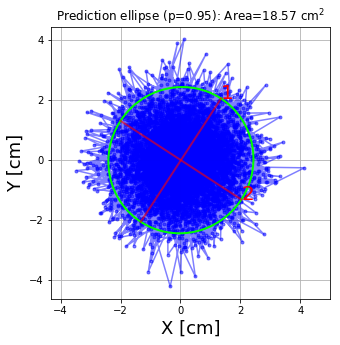

Area = 18.572765377574335
Semi-axes = [2.45610669 2.40701874]
Angles = [ 56.92978672 -33.07021328]
Center = [ 0.01641617 -0.00989277]
Rotation matrix =
 [[ 0.54566638  0.83800251]
 [ 0.83800251 -0.54566638]]


In [5]:
P = np.random.randn(10000, 2)
area, axes, angles, center, R = hyperellipsoid(P, units='cm', show=True)
print('Area =', area)
print('Semi-axes =', axes)
print('Angles =', angles)
print('Center =', center)
print('Rotation matrix =\n', R)

For other data:

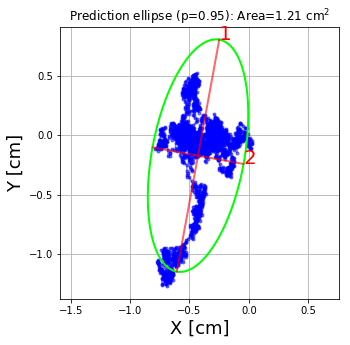

Area = 1.2145303675104402
Semi-axes = [0.99253322 0.38950538]
Angles = [ 79.62776911 -10.37223089]
Center = [-0.42756993 -0.17109987]
Rotation matrix =
 [[ 0.18004242  0.98365885]
 [ 0.98365885 -0.18004242]]


In [6]:
y = np.cumsum(np.random.randn(3000)) / 50
x = np.cumsum(np.random.randn(3000)) / 100
area, axes, angles, center, R = hyperellipsoid(x, y, units='cm', show=True)
print('Area =', area)
print('Semi-axes =', axes)
print('Angles =', angles)
print('Center =', center)
print('Rotation matrix =\n', R)

### Find points outside the ellipse

The **outside_hyperellipsoid** function can be used to determine whether specific points lie outside the ellipse as demonstrated below.

Note that the proportion of points outside a 95% ellipse is expected to tend toward 0.05 as n increases.

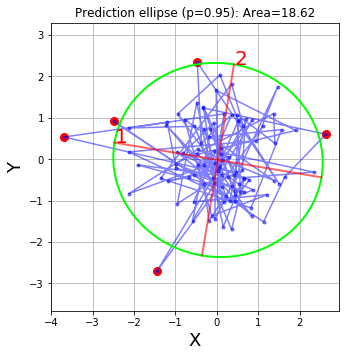

Number of points outside ellipsoid: 5
Proportion of points outside ellipsoid: 0.050


In [7]:
from hyperellipsoid import outside_hyperellipsoid


#Calculate ellipse and whether or not points lie outside:
np.random.seed(6)
P = np.random.randn(100, 2)  #points
volume, axes, angles, center, R = hyperellipsoid(P, pvalue=.95, show=False)
b = outside_hyperellipsoid(axes, angles, center, R, P) #binary hit-miss (outside ellipse?)
p = P[b] #points outside ellipse

#Plot:
fig = plt.figure(figsize=(4, 4))
ax  = fig.add_axes([0, 0, 1, 1])
ax.plot(p[:,0], p[:,1], 'ro', ms=8)  #points outside ellipse plotted as large red dots
volume, axes, angles, center, R = hyperellipsoid(P, pvalue=.95, show=True, ax=ax)

# Report:
print('Number of points outside ellipsoid: %d' %b.sum())
print('Proportion of points outside ellipsoid: %.3f' %b.mean())

#### Prediction ellipsoid

For a trivariate random data with normal distribution with mean 0 and variance 1, the prediction ellipsoid should be a sphere:

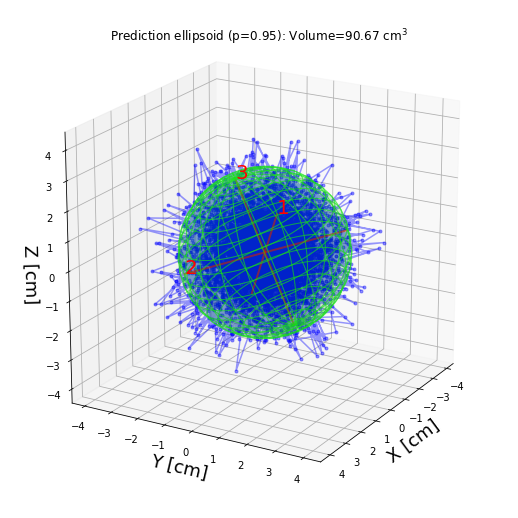

Volume = 90.66797382781313
Semi-axes = [2.83080025 2.79215201 2.73852694]
Angles = [-15.88378989 -13.16031177 161.24997778]
Center = [ 0.00393022 -0.01780758  0.01150057]
Rotation matrix =
 [[-0.92206064 -0.36817207  0.11938807]
 [ 0.31299781 -0.89074547 -0.32955255]
 [ 0.22767643 -0.26649923  0.93655838]]


In [8]:
P = np.random.randn(10000, 3)
volume, axes, angles, center, R = hyperellipsoid(P, units='cm', show=True)
print('Volume =', volume)
print('Semi-axes =', axes)
print('Angles =', angles)
print('Center =', center)
print('Rotation matrix =\n', R)

For other data:

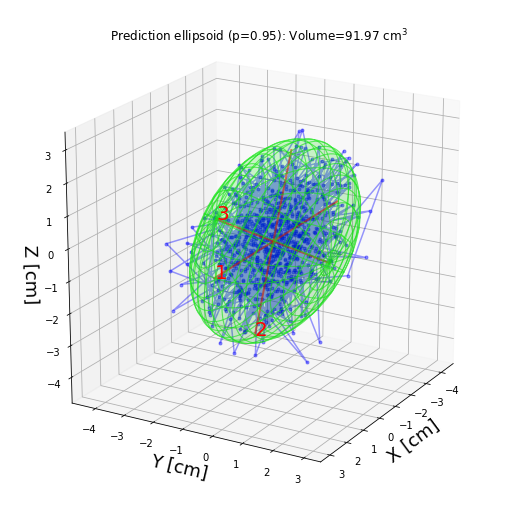

Volume = 91.97004935222222
Semi-axes = [3.85939857 3.00260608 1.89469722]
Angles = [-55.60639772 -39.13088344 118.46977354]
Center = [-0.01948494 -0.03595066 -0.00582128]
Rotation matrix =
 [[-0.36977539 -0.74480946 -0.55545029]
 [ 0.68189918  0.18851428 -0.70673607]
 [ 0.63109402 -0.64009471  0.43817702]]


In [9]:
P = np.random.randn(1000, 3)
P[:, 2] = P[:, 2] + P[:, 1]*.5
P[:, 1] = P[:, 1] + P[:, 0]*.5
volume, axes, angles, center, R = hyperellipsoid(P, units='cm', show=True)
print('Volume =', volume)
print('Semi-axes =', axes)
print('Angles =', angles)
print('Center =', center)
print('Rotation matrix =\n', R)

### Find points outside the (hyper)ellipsoid

The **outside_hyperellipsoid** function can be used to determine whether specific points lie outside the ellipsoid as demonstrated below.

Note that the proportion of points outside a 95% ellipsoid is expected to tend toward 0.05 as n increases.

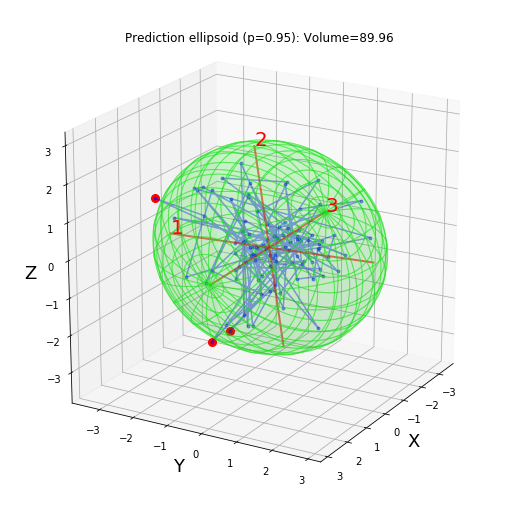

Number of points outside ellipsoid: 3
Proportion of points outside ellipsoid: 0.030


In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from hyperellipsoid import _plot, outside_hyperellipsoid

# fig = plt.figure(figsize=(7, 7))
# ax = fig.add_axes([0, 0, 1, 1], projection='3d')



#Calculate ellipsoid and whether or not points lie outside:
np.random.seed(6)
P = np.random.randn(100, 3)  #points
volume, axes, angles, center, R = hyperellipsoid(P, pvalue=.95, show=False)
b = outside_hyperellipsoid(axes, angles, center, R, P) #binary hit-miss (outside ellipsoid?)
p = P[b] #points outside ellipsoid

#Plot:
fig = plt.figure(figsize=(7, 7))
ax  = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.plot(p[:,0], p[:,1], p[:,2], 'ro', ms=8)  #points outside ellipse plotted as large red dots
volume, axes, angles, center, R = hyperellipsoid(P, pvalue=.95, show=True, ax=ax)

# Report:
print('Number of points outside ellipsoid: %d' %b.sum())
print('Proportion of points outside ellipsoid: %.3f' %b.mean())

To be able to rotate and zoom the figure, for now you will have to plot it in a separate window:

In [11]:
# plot figure in a separate window
%matplotlib qt

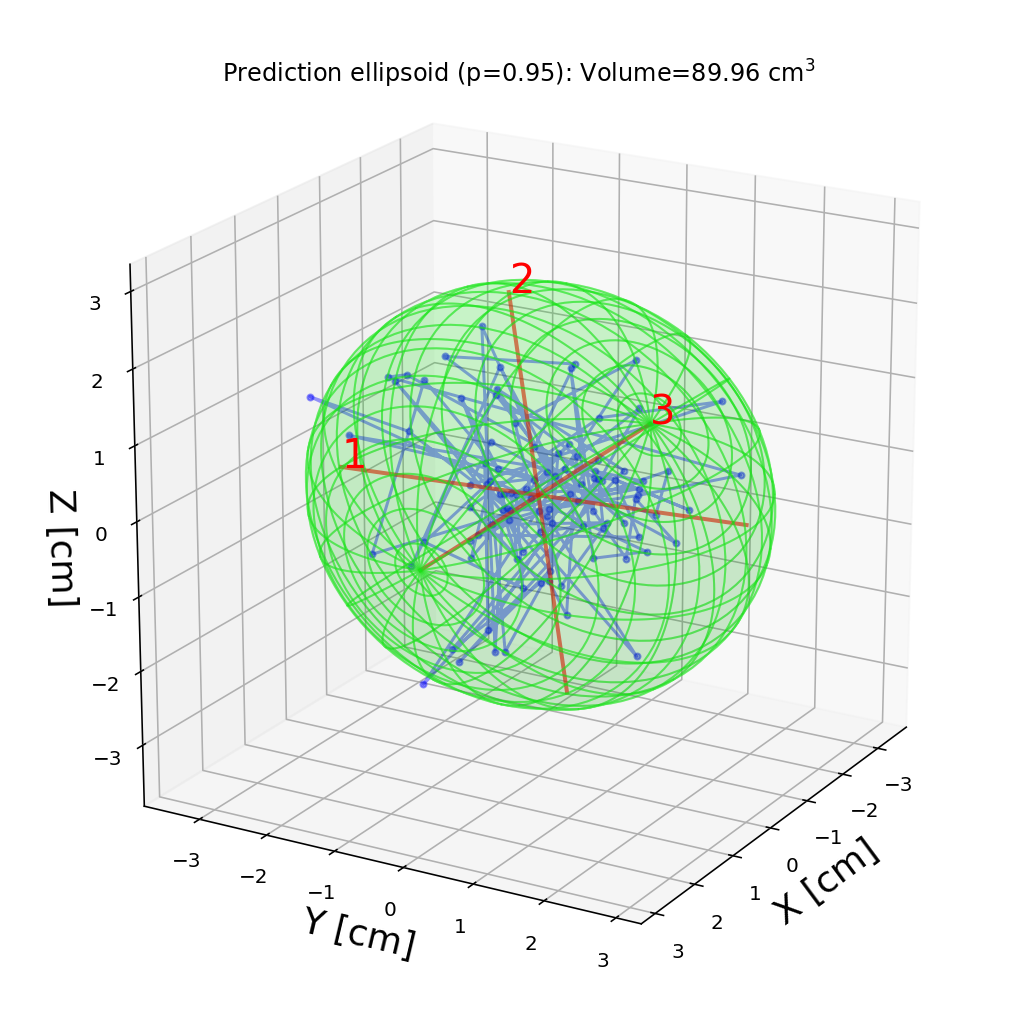

In [12]:
hyperellipsoid(P, units='cm', show=True);

Let's generate an animation where the ellipsoid is rotated to better visualize it in this notebook:

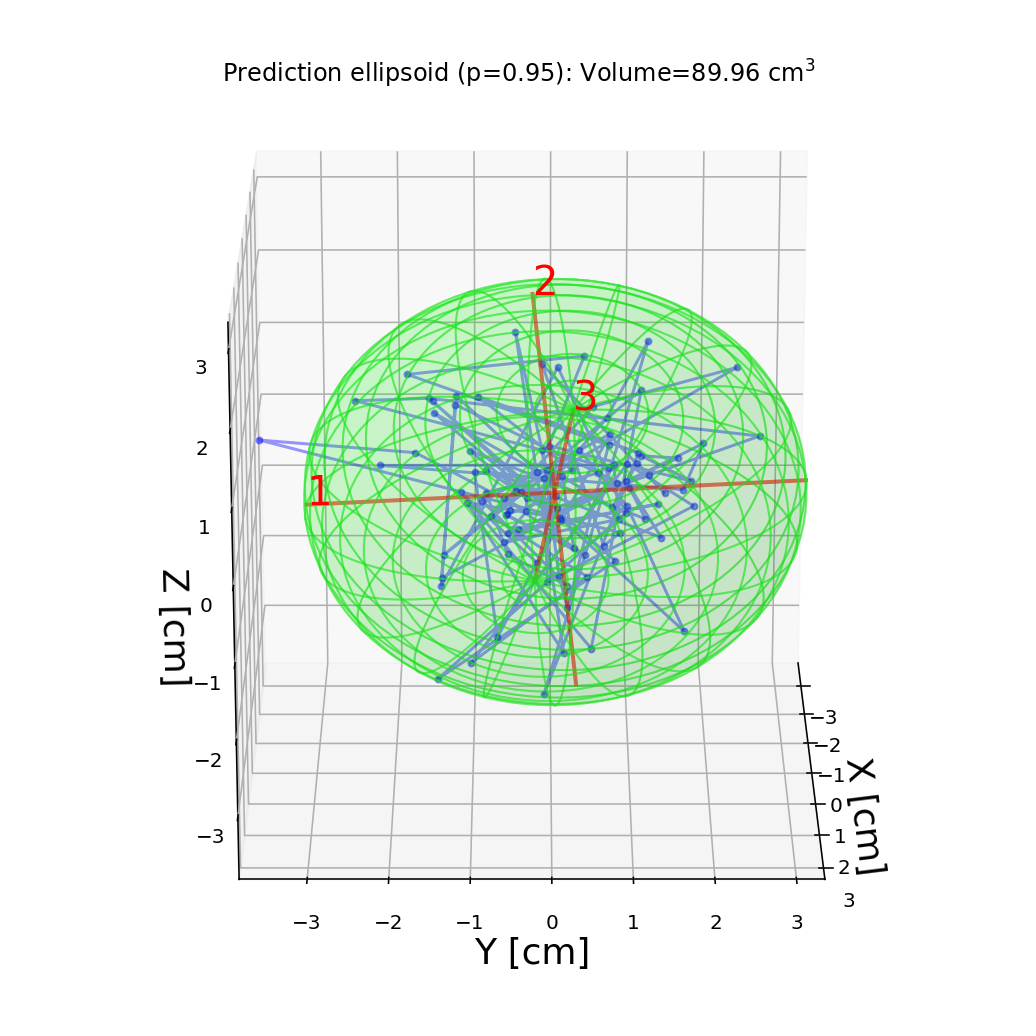

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from hyperellipsoid import _plot

fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
pts = ax.plot([], [], [], 'o')

volume, axes, angles, center, R = hyperellipsoid(P, units='cm', show=False, ax=None)
_plot(P, volume, axes, center, R, .95, 'cm', ax)

# animation function
def animate(i):
    # rotate the point of view
    ax.view_init(20, 3*i)
    fig.canvas.draw()
    return pts
    
# Animation object
anim = animation.FuncAnimation(fig, func=animate, frames=120, interval=30, blit=True)

plt.show()

This is the animation you see in a separate window when you run the code above:

<div class='center-align'><figure><img src='./../images/ellipsoid.gif' width=450 alt='ellipsoid'/></figure></div><br>

To save the animation generated above as a video file (you need to have [FFmpeg](http://www.ffmpeg.org/) or [ImageMagick](http://www.imagemagick.org/script/index.php) installed):

In [14]:
# anim.save('ellipsoid.gif', writer='imagemagick', fps=12, dpi=36)
# or
# anim.save('ellipsoid.mp4', writer='ffmpeg', fps=50)

In [15]:
# get back the inline plot
%matplotlib inline

## References

- Chew V (1966) [Confidence, Prediction, and Tolerance Regions for the Multivariate Normal Distribution](http://www.jstor.org/stable/2282774). Journal of the American Statistical Association, 61, 315, pp. 605-617.   
- Duarte M (2015) [Comments on “Ellipse area calculations and their applicability in posturography” (Schubert and Kirchner, vol.39, pages 518-522, 2014)](http://demotu.org/pubs/GP15.pdf). Gait & Posture, 41, 44-45. <a href="http://www.ncbi.nlm.nih.gov/pubmed/25194690" target="_blank">PubMed</a>.  
- Schubert P, Kirchner M (2014) [Ellipse area calculations and their applicability in posturography](http://www.sciencedirect.com/science/article/pii/S0966636213005961). Gait & Posture, 39, 518–522.

## Function ellipseoid.py

In [16]:
# %load './../functions/hyperellipsoid.py'
"""Prediction hyperellipsoid for multivariate data."""

from __future__ import division, print_function
import numpy as np

__author__ = 'Marcos Duarte, https://github.com/demotu/BMC'
__version__ = "1.0.3"
__license__ = "MIT"


def hyperellipsoid(P, y=None, z=None, pvalue=.95, units=None, show=True, ax=None):
    """
    Prediction hyperellipsoid for multivariate data.

    The hyperellipsoid is a prediction interval for a sample of a multivariate
    random variable and is such that there is pvalue*100% of probability that a
    new observation will be contained inside the hyperellipsoid [1]_.  
    The hyperellipsoid is also a tolerance region such that the average or
    expected value of the proportion of the population contained in this region
    is exactly pvalue*100% (called Type 2 tolerance region by Chew (1966) [1]_).

    The directions and lengths of the semi-axes are found, respectively, as the
    eigenvectors and eigenvalues of the covariance matrix of the data using
    the concept of principal components analysis (PCA) [2]_ or singular value
    decomposition (SVD) [3]_ and the length of the semi-axes are adjusted to
    account for the necessary prediction probability.

    The volume of the hyperellipsoid is calculated with the same equation for
    the volume of a n-dimensional ball [4]_ with the radius replaced by the
    semi-axes of the hyperellipsoid.

    This function calculates the prediction hyperellipsoid for the data,
    which is considered a (finite) sample of a multivariate random variable
    with normal distribution (i.e., the F distribution is used and not
    the approximation by the chi-square distribution).

    Parameters
    ----------
    P : 1-D or 2-D array_like
        For a 1-D array, P is the abscissa values of the [x,y] or [x,y,z] data.
        For a 2-D array, P is the joined values of the multivariate data.
        The shape of the 2-D array should be (n, p) where n is the number of
        observations (rows) and p the number of dimensions (columns).
    y : 1-D array_like, optional (default = None)
        Ordinate values of the [x, y] or [x, y, z] data.
    z : 1-D array_like, optional (default = None)
        Ordinate values of the [x, y] or [x, y, z] data.
    pvalue : float, optional (default = .95)
        Desired prediction probability of the hyperellipsoid.
    units : str, optional (default = None)
        Units of the input data.
    show : bool, optional (default = True)
        True (1) plots data in a matplotlib figure, False (0) to not plot.
        Only the results for p=2 (ellipse) or p=3 (ellipsoid) will be plotted.
    ax : a matplotlib.axes.Axes instance (default = None)

    Returns
    -------
    hypervolume : float
        Hypervolume (e.g., area of the ellipse or volume of the ellipsoid).
    axes : 1-D array
        Lengths of the semi-axes hyperellipsoid (largest first).
    angles : 1-D array
        Angles of the semi-axes hyperellipsoid (only for 2D or 3D data).
        For the ellipsoid (3D data), the angles are the Euler angles
        calculated in the XYZ sequence.
    center : 1-D array
        Centroid of the hyperellipsoid.
    rotation : 2-D array
        Rotation matrix for hyperellipsoid semi-axes (only for 2D or 3D data).

    References
    ----------
    .. [1] http://www.jstor.org/stable/2282774
    .. [2] http://en.wikipedia.org/wiki/Principal_component_analysis
    .. [3] http://en.wikipedia.org/wiki/Singular_value_decomposition
    .. [4] http://en.wikipedia.org/wiki/Volume_of_an_n-ball

    Examples
    --------
    >>> from hyperellipsoid import hyperellipsoid
    >>> y = np.cumsum(np.random.randn(3000)) / 50
    >>> x = np.cumsum(np.random.randn(3000)) / 100
    >>> area, axes, angles, center, R = hyperellipsoid(x, y, units='cm')
    >>> print('Area =', area)
    >>> print('Semi-axes =', axes)
    >>> print('Angles =', angles)
    >>> print('Center =', center)
    >>> print('Rotation matrix =\n', R)

    >>> P = np.random.randn(1000, 3)
    >>> P[:, 2] = P[:, 2] + P[:, 1]*.5
    >>> P[:, 1] = P[:, 1] + P[:, 0]*.5
    >>> volume, axes, angles, center, R = hyperellipsoid(P, units='cm')
    """

    from scipy.stats import f as F
    from scipy.special import gamma

    P = np.array(P, ndmin=2, dtype=float)
    if P.shape[0] == 1:
        P = P.T
    if y is not None:
        y = np.array(y, copy=False, ndmin=2, dtype=float)
        if y.shape[0] == 1:
            y = y.T
        P = np.concatenate((P, y), axis=1)
    if z is not None:
        z = np.array(z, copy=False, ndmin=2, dtype=float)
        if z.shape[0] == 1:
            z = z.T
        P = np.concatenate((P, z), axis=1)
    # covariance matrix
    cov = np.cov(P, rowvar=0)
    # singular value decomposition
    U, s, Vt = np.linalg.svd(cov)
    p, n = s.size, P.shape[0]
    # F percent point function
    fppf = F.ppf(pvalue, p, n-p)*(n-1)*p*(n+1)/n/(n-p)
    # semi-axes (largest first)
    saxes = np.sqrt(s*fppf)
    hypervolume = np.pi**(p/2)/gamma(p/2+1)*np.prod(saxes)
    # rotation matrix
    if p == 2 or p == 3:
        R = Vt
        if s.size == 2:
            angles = np.array([np.rad2deg(np.arctan2(R[1, 0], R[0, 0])),
                               90-np.rad2deg(np.arctan2(R[1, 0], -R[0, 0]))])
        else:
            angles = rotXYZ(R, unit='deg')
        # centroid of the hyperellipsoid
        center = np.mean(P, axis=0)
    else:
        R, angles = None, None

    if show and (p == 2 or p == 3):
        _plot(P, hypervolume, saxes, center, R, pvalue, units, ax)

    return hypervolume, saxes, angles, center, R


def _plot(P, hypervolume, saxes, center, R, pvalue, units, ax):
    """Plot results of the hyperellipsoid function, see its help."""

    try:
        import matplotlib.pyplot as plt
    except ImportError:
        print('matplotlib is not available.')
    else:
        # code based on https://github.com/minillinim/ellipsoid:
        # parametric equations
        u = np.linspace(0, 2*np.pi, 100)
        if saxes.size == 2:
            x = saxes[0]*np.cos(u)
            y = saxes[1]*np.sin(u)
            # rotate data
            for i in range(len(x)):
                [x[i], y[i]] = np.dot([x[i], y[i]], R) + center
        else:
            v = np.linspace(0, np.pi, 100)
            x = saxes[0]*np.outer(np.cos(u), np.sin(v))
            y = saxes[1]*np.outer(np.sin(u), np.sin(v))
            z = saxes[2]*np.outer(np.ones_like(u), np.cos(v))
            # rotate data
            for i in range(len(x)):
                for j in range(len(x)):
                    [x[i,j],y[i,j],z[i,j]] = np.dot([x[i,j],y[i,j],z[i,j]], R) + center

        if saxes.size == 2:
            if ax is None:
                fig, ax = plt.subplots(1, 1, figsize=(5, 5))
            # plot raw data
            ax.plot(P[:, 0], P[:, 1], '.-', color=[0, 0, 1, .5])
            # plot ellipse
            ax.plot(x, y, color=[0, 1, 0, 1], linewidth=2)
            # plot axes
            for i in range(saxes.size):
                # rotate axes
                a = np.dot(np.diag(saxes)[i], R).reshape(2, 1)
                # points for the axes extremities
                a = np.dot(a, np.array([-1, 1], ndmin=2))+center.reshape(2, 1)
                ax.plot(a[0], a[1], color=[1, 0, 0, .6], linewidth=2)
                ax.text(a[0, 1], a[1, 1], '%d' % (i + 1),
                        fontsize=20, color='r')
            plt.axis('equal')
            plt.grid()
            title = r'Prediction ellipse (p=%4.2f): Area=' % pvalue
            if units is not None:
                units2 = ' [%s]' % units
                units = units + r'$^2$'
                title = title + r'%.2f %s' % (hypervolume, units)
            else:
                units2 = ''
                title = title + r'%.2f' % hypervolume
        else:
            from mpl_toolkits.mplot3d import Axes3D
            if ax is None:
                fig = plt.figure(figsize=(7, 7))
                ax = fig.add_axes([0, 0, 1, 1], projection='3d')
            ax.view_init(20, 30)
            # plot raw data
            ax.plot(P[:, 0], P[:, 1], P[:, 2], '.-', color=[0, 0, 1, .4])
            # plot ellipsoid
            ax.plot_surface(x, y, z, rstride=5, cstride=5, color=[0, 1, 0, .1],
                            linewidth=1, edgecolor=[.1, .9, .1, .4])
            # ax.plot_wireframe(x, y, z, color=[0, 1, 0, .5], linewidth=1)
            #                  rstride=3, cstride=3, edgecolor=[0, 1, 0, .5])
            # plot axes
            for i in range(saxes.size):
                # rotate axes
                a = np.dot(np.diag(saxes)[i], R).reshape(3, 1)
                # points for the axes extremities
                a = np.dot(a, np.array([-1, 1], ndmin=2))+center.reshape(3, 1)
                ax.plot(a[0], a[1], a[2], color=[1, 0, 0, .6], linewidth=2)
                ax.text(a[0, 1], a[1, 1], a[2, 1], '%d' % (i+1),
                        fontsize=20, color='r')
            lims = [np.min([P.min(), x.min(), y.min(), z.min()]),
                    np.max([P.max(), x.max(), y.max(), z.max()])]
            ax.set_xlim(lims)
            ax.set_ylim(lims)
            ax.set_zlim(lims)
            title = r'Prediction ellipsoid (p=%4.2f): Volume=' % pvalue
            if units is not None:
                units2 = ' [%s]' % units
                units = units + r'$^3$'
                title = title + r'%.2f %s' % (hypervolume, units)
            else:
                units2 = ''
                title = title + r'%.2f' % hypervolume
            ax.set_zlabel('Z' + units2, fontsize=18)

        ax.set_xlabel('X' + units2, fontsize=18)
        ax.set_ylabel('Y' + units2, fontsize=18)
        plt.title(title)
        plt.show()

        return ax


def rotXYZ(R, unit='deg'):
    """ Compute Euler angles from matrix R using XYZ sequence."""

    angles = np.zeros(3)
    angles[0] = np.arctan2(R[2, 1], R[2, 2])
    angles[1] = np.arctan2(-R[2, 0], np.sqrt(R[0, 0]**2 + R[1, 0]**2))
    angles[2] = np.arctan2(R[1, 0], R[0, 0])

    if unit[:3].lower() == 'deg':  # convert from rad to degree
        angles = np.rad2deg(angles)

    return angles
